# Business Understanding

For my analysis, I would like to take a further dive into the Stack Overflow Developers Survey dataset and understand the answers that my fellow Latinx/Black community gave in the survey

Questions that I would like to answer:

“How many survey entries were from a Latinx or Black race-ethnicity?”
“Which top 5 countries had the most amount of Latinx participants?”
“Which top 5 countries had the most amount of Black or of African descent participants?
“How much did the salary increase from 2017–2018 for Latinx and Black folks?”
“What was the increase percentage of Latinx/Black participants with Bachelors’, Masters and Postdoctoral degrees?”

In [17]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from collections import defaultdict
import overflow as of
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [18]:
# Read the 2017-2018 Stackoverflow developer survey datasets
survey_data2018 = pd.read_csv('survey_results_public2018.csv')
survey_data2017 = pd.read_csv('survey_results_public2017.csv')

/Users/darrylbalderas/projects/stack-overflow/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Understanding, Data Modeling, and Prepare Data

In [19]:
## Race and Salary have different names in the 2017 and 2018 datasets
column_of_interest2018 = ['Country','RaceEthnicity','FormalEducation', 'ConvertedSalary']
column_of_interest2017 = ['Country','Race','FormalEducation', 'Salary']

educations = {"Master": ["Master's degree", "Master’s degree (MA, MS, M.Eng., MBA, etc.)"],
              "Bachelor": ["Bachelor’s degree (BA, BS, B.Eng., etc.)", "Bachelor's degree"],
              "Doctor": ["Other doctoral degree (Ph.D, Ed.D., etc.)", "Doctoral degree"]}

survey_data2017 = survey_data2017[column_of_interest2017]
survey_data2018 = survey_data2018[column_of_interest2018]

### Handling categorical colums

No dummy variables will not be created so no need to manipulate with categorical variables. The only columns that we have to tweak a little bit is `Race` and `RaceEthnicity` column since the rows contains values that are separated by a semi colon like this 

`East Asian; White or of European descent `

I created a function `of.clean_multi_answers` that is located in `overflow.py`
which handles Race and RaceEthnicities columns by giving me a count of the semi-colon separated values

In [20]:
# These are the non-numerical columns 
print("2017 Survey Data\n",
      survey_data2017.select_dtypes(include=['object', 'category']).dtypes)

print("\n2018 Survey Data\n",
      survey_data2018.select_dtypes(include=['object', 'category']).dtypes)

2017 Survey Data
 Country            object
Race               object
FormalEducation    object
dtype: object

2018 Survey Data
 Country            object
RaceEthnicity      object
FormalEducation    object
dtype: object


In [21]:
# show how of `of.clean_multi_answers` handles that separated semi-colon values
print(of.clean_multi_answers(survey_data2017, 'index_type', 'Race'))
print(of.clean_multi_answers(survey_data2018, 'index_type', 'RaceEthnicity'))

                                                    count
index_type                                               
White or of European descent                        24580
South Asian                                          2896
Hispanic or Latino/Latina                            1859
East Asian                                           1622
Middle Eastern                                       1183
I prefer not to say                                   873
Black or of African descent                           828
I don’t know                                          651
Native American, Pacific Islander, or Indigenou...    291
                                                    count
index_type                                               
White or of European descent                        42636
South Asian                                          6636
Hispanic or Latino/Latina                            3860
East Asian                                           2933
Middle Eastern

### Missing values in both the 2017 and 2018 datasets
Given that I used pandas.value_counts() it disregards missing values so I do not delete missing values from both datasets

In [22]:
# Percentage of missing data in the Stack overflow 2017
survey_data2017.isnull().mean() * 100

Country            0.0000
Race              35.7235
FormalEducation    0.0000
Salary            74.9163
dtype: float64

In [23]:
# Percentage of missing data in the Stack overflow 2018
survey_data2018.isnull().mean() * 100

Country            0.4168
RaceEthnicity     41.8613
FormalEducation    4.2001
ConvertedSalary   51.7455
dtype: float64

## Question 1
“How many survey entries were from a Latinx or Black race-ethnicity?” 

                                                    count
index_type                                               
White or of European descent                        24580
South Asian                                          2896
Hispanic or Latino/Latina                            1859
East Asian                                           1622
Middle Eastern                                       1183
I prefer not to say                                   873
Black or of African descent                           828
I don’t know                                          651
Native American, Pacific Islander, or Indigenou...    291


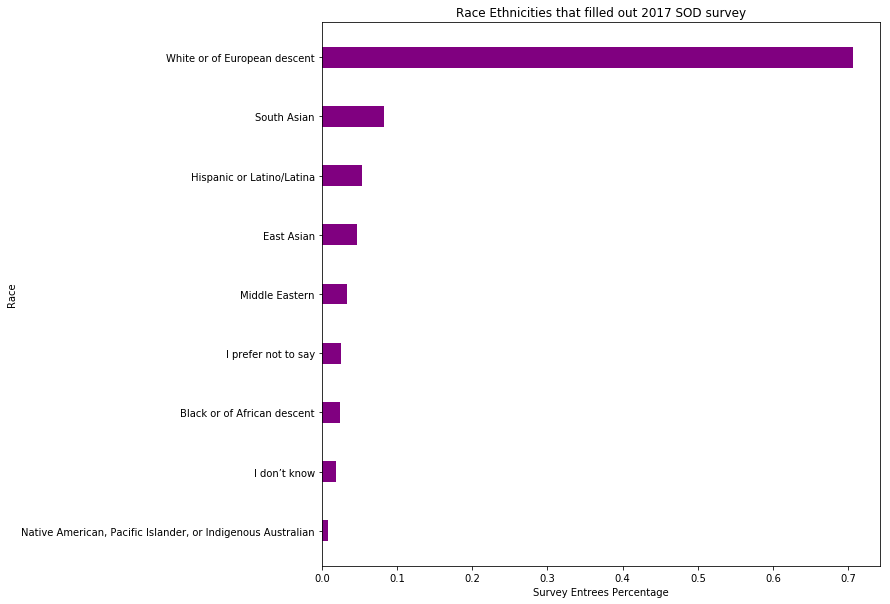

In [24]:
races_df = of.clean_multi_answers(survey_data2017, 'index_type', 'Race')
print(races_df)
of.plot_race_distribution(races_df, title="Race Ethnicities that filled out 2017 SOD survey", color="purple")

                                                    count
index_type                                               
White or of European descent                        42636
South Asian                                          6636
Hispanic or Latino/Latina                            3860
East Asian                                           2933
Middle Eastern                                       2373
Black or of African descent                          1585
Native American, Pacific Islander, or Indigenou...    445


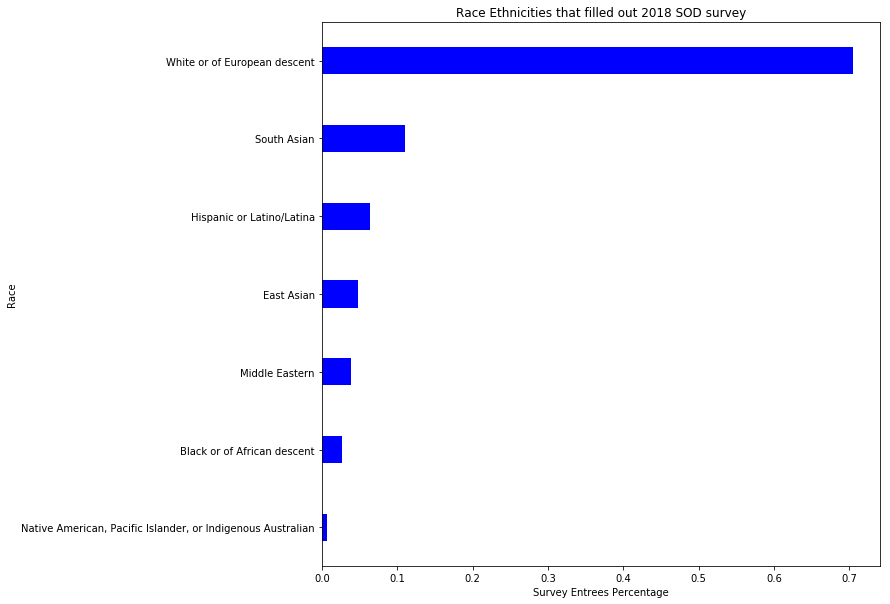

In [25]:
races_df2018 = of.clean_multi_answers(survey_data2018, 'index_type', 'RaceEthnicity')
print(races_df2018)
of.plot_race_distribution(races_df2018, title="Race Ethnicities that filled out 2018 SOD survey", color="blue")

In [26]:
total2017 = of.get_total_latinx_black_count(races_df)
of.display_statistics(races_df, total2017, "2017")


2687 individuals reported as Latinx/Black participated in the 2017 Stack Overflow Developer survey
Latinx/Black account for 7.725% of the 2017 Stack Overflow survey participants


In [27]:
total2018 = of.get_total_latinx_black_count(races_df2018)
of.display_statistics(races_df2018, total2018, "2018")


5445 individuals reported as Latinx/Black participated in the 2018 Stack Overflow Developer survey
Latinx/Black account for 9.005% of the 2018 Stack Overflow survey participants


In [28]:
total_increase = (abs(total2017 - total2018) / (total2017 + total2018)) * 100 
print("There was a {:.2f}% increase of Latinx/Black Stack Overflow survey participants from 2017 to 2018".format(total_increase))

There was a 33.92% increase of Latinx/Black Stack Overflow survey participants from 2017 to 2018


## Question 2

“Which top 5 countries had the most amount of Latinx participants?”

“Which top 5 countries had the most amount of Black or of African descent participants?


The following juypter notebook cells display bar graphs of top five countries that have Latinx and Black entries 

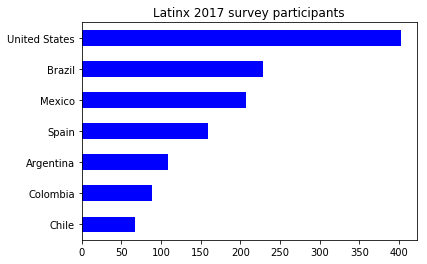

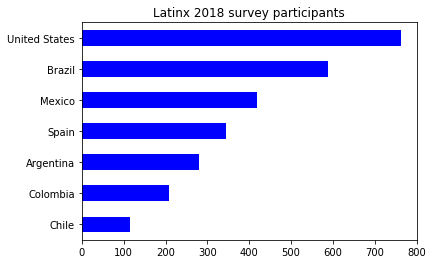

In [29]:
#Show Latinx survey participants
of.plot_countries_ethnicities(survey_data2017, survey_data2018, 
                           of.is_latinx, 
                           "Latinx 2017 survey participants", 
                           "Latinx 2018 survey participants", 
                           "blue", 7)

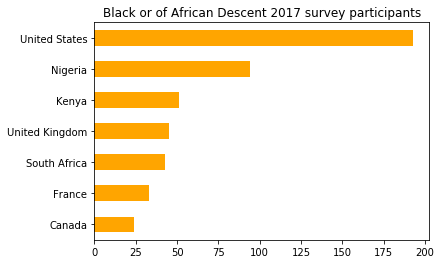

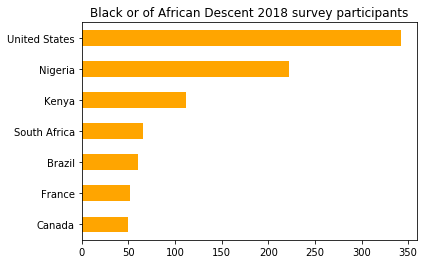

In [30]:
#Show Black or of African Descent survey participants

of.plot_countries_ethnicities(survey_data2017, survey_data2018, 
                           of.is_black, 
                           "Black or of African Descent 2017 survey participants", 
                           "Black or of African Descent 2018 survey participants", 
                           "orange", 7)

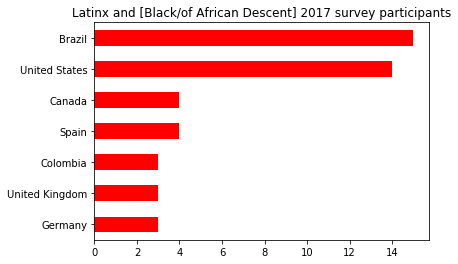

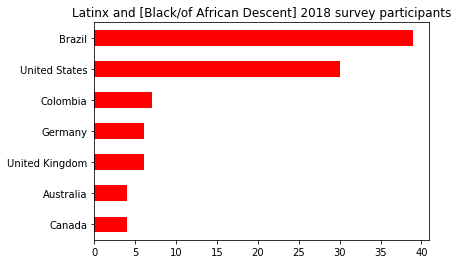

In [31]:
#Show Both Latinx and Black/African Descent
of.plot_countries_ethnicities(survey_data2017, survey_data2018, 
                           of.is_latinx_and_black, 
                           "Latinx and [Black/of African Descent] 2017 survey participants", 
                           "Latinx and [Black/of African Descent] 2018 survey participants", 
                           "red", 7)

## Question 3

“How much did the salary increase from 2017–2018 for Latinx and Black folks?”

In [35]:
print("{} Salary for Latinx/Black StackOverflow Survey Participants".format("2018"))
descriptive_stats_2018 = of.get_salary_dataframe(survey_data2018, "RaceEthnicity", "ConvertedSalary")
print(descriptive_stats_2018)

print("\n{} Salary for Latinx/Black StackOverflow Survey Participants".format("2017"))
descriptive_stats_2017 = of.get_salary_dataframe(survey_data2017, "Race", "Salary")
print(descriptive_stats_2017)

2018 Salary for Latinx/Black StackOverflow Survey Participants
count     3355.0000
mean     45279.1714
std      39038.8424
min          0.0000
25%      14106.0000
50%      33045.0000
75%      67721.0000
max     168000.0000
Name: ConvertedSalary, dtype: float64

2017 Salary for Latinx/Black StackOverflow Survey Participants
count      807.0000
mean     45701.3388
std      37395.4095
min          1.7158
25%      15485.2855
50%      36746.4115
75%      68181.8182
max     150000.0000
Name: Salary, dtype: float64


In [36]:
total = descriptive_stats_2017['mean'] + descriptive_stats_2018['mean'] 
delta = descriptive_stats_2018['mean'] - descriptive_stats_2017['mean'] 

print("There was a {:0.3f}% percentage salary change from 2017 to 2018 for Latinx and Black around the world".format( (delta/total) * 100 ))

There was a -0.464% percentage salary change from 2017 to 2018 for Latinx and Black around the world


## Question 4

“What was the increase percentage of Latinx/Black participants with Bachelors’, Masters and Postdoctoral degrees?”

In [37]:
df = survey_data2017.loc[of.get_indexes(survey_data2017, "Race", of.is_latinx_or_black),:].reset_index()
education_2017 = of.get_education_degrees(df['FormalEducation'].value_counts(), educations)
for key in education_2017:
    print("{} degrees : {}".format(key, education_2017[key]))

Master degrees : 369
Bachelor degrees : 1201
Doctor degrees : 51


In [38]:
df = survey_data2018.loc[of.get_indexes(survey_data2018, "RaceEthnicity", of.is_latinx_or_black),:].reset_index()
education_2018 = of.get_education_degrees(df['FormalEducation'].value_counts(), educations)
for key in education_2018:
    print("{} degrees : {}".format(key, education_2018[key]))

Master degrees : 756
Bachelor degrees : 2380
Doctor degrees : 80


In [39]:
for e in educations:
    total = education_2018[e] + education_2017[e]
    delta = education_2018[e] - education_2017[e]
    if delta > 0:
        print("{} increase by {:.2f}% for Latinx/Black community from 2017 to 2018\n".format(e, (delta/total) * 100 ))
    else:
        print("{} decrease by {:.2f}% for Latinx/Black community from 2017 to 2018\n".format(e, (delta/total) * 100 ))

Master increase by 34.40% for Latinx/Black community from 2017 to 2018

Bachelor increase by 32.92% for Latinx/Black community from 2017 to 2018

Doctor increase by 22.14% for Latinx/Black community from 2017 to 2018



# Evaluate the Results

The main findings of the code can be found at the post available [here](https://medium.com/@drrylbalderas/black-and-brown-in-the-flow-e17aa32876ea)